In [1]:
#=_

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os

In [160]:
dataSet = pd.read_excel("../dataSet/symptoms.xlsx")
dataSet = dataSet.replace("Yes",1)
dataSet = dataSet.replace("No",0)
dataSet.head()

,Dry Cough,High Fever,Sore Throat,Difficulty in breathing,Infected with Covid19
0,0,2,3,0,0
1,15,15,20,16,1
2,4,5,0,0,0
3,4,7,9,10,0
4,0,0,1,0,0


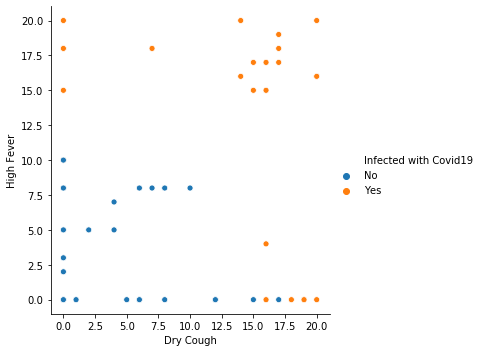

In [32]:
sns.relplot(x="Dry Cough", y= "High Fever" , data=dataSet , hue="Infected with Covid19" )

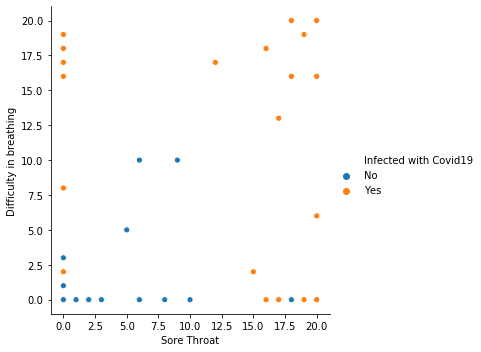

In [34]:
sns.relplot(x="Sore Throat" , y = "Difficulty in breathing" , data = dataSet , hue="Infected with Covid19")

In [35]:
def train_test_split(dataset,training_size=0.8):
    #shuffle dataset 
    dataset= dataset.sample(frac=1)
    
    #usually,80 percentage of dataset are taken as a training set
    # last index value of 80percentange portion
    
    index = round(training_size * len(dataset)) #len returns no. of rows
    
    # saperating training dataset and testing dataset
    
    x_train = dataset.iloc[:index,:-1] # not including target/output/label/Y 
    y_train = dataset.iloc[:index,-1] # lable / output/target of the training dataset [x1,x2,x3... y] = [x1 , x2 ... xn-1] [y] 
                                        # here [x1 x2 .. xn-1] is x_train and y_train = [y]
    
    x_test = dataset.iloc[index: , :-1]
    y_test = dataset.iloc[index: , -1]
    
    return x_train,y_train, x_test,y_test
    
def euclideanDistance(x,y):
    return np.sqrt(np.sum((x-y)**2)) 
    

In [36]:
class KNN:
    def __init__ (self,x_train,y_train,k=3) : #initializing KNN with training data set (features and label) and k
        self.x_train= x_train
        self.y_train = y_train
        self.k  = k
        
    def predict(self,x_test):
        prediction = [self._predict(x) for x in x_test.values]
        return prediction
    
    def _predict(self,x_test): #here x_test is a single touple
        #calculate euclidean distance between each training data and the testing data 
        distances = [euclideanDistance(x_test,X) for X in self.x_train.values]
        
        # returns the index of k nearest items
        k_nearest_indices = np.argsort(distances)[:self.k]  # returns the list of indices corresponding to the sorted value
        
        #get the target label of the first k items of the sorted distance 
        k_nearest_labels = [self.y_train.iloc[i] for i in k_nearest_indices]
        
        # majority vote most common class label
        majority_label = Counter(k_nearest_labels).most_common(1)[0][0]
        
        return majority_label
        
        

In [161]:
def main():
    dataSet = pd.read_excel("../dataSet/symptoms.xlsx")
    dataSet.head()

    x_train,y_train,x_test,y_test = train_test_split(dataSet,training_size= 0.9) 

    knn_model = KNN(x_train,y_train,k=3)
    predictions = knn_model.predict(x_test)


#     # checking for accuracy
    count=0
    for i in range(len(predictions)):
        if predictions[i] == y_test.iloc[i]:
            count +=1
    accuracy = count/len(predictions)*100
    print("The accuracy of the KNN model is ",accuracy,"%")
    


    
main()


TypeError: Invalid parameters passed: {'training_size': 0.9}

array([ 0, 15,  4,  4,  0,  6, 16, 17,  0, 16,  0,  7,  8, 15,  2,  5,  0,
       17,  0,  7,  0, 20, 16,  0, 17,  0,  6, 14, 15, 20,  0,  8, 10, 12,
       17, 12, 20, 16,  1, 14,  0, 19, 18,  0, 20,  0,  6, 19],
      dtype=int64)

In [68]:
dataSet.head()

,Dry Cough,High Fever,Sore Throat,Difficulty in breathing,Infected with Covid19
0,0,2,3,0,No
1,15,15,20,16,Yes
2,4,5,0,0,No
3,4,7,9,10,No
4,0,0,1,0,No


In [73]:
dataSet.drop('Infected with Covid19',axis=1).head()

,Dry Cough,High Fever,Sore Throat,Difficulty in breathing
0,0,2,3,0
1,15,15,20,16
2,4,5,0,0
3,4,7,9,10
4,0,0,1,0


In [77]:
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [162]:
x_train,x_test,y_train,y_test = train_test_split(dataSet.drop("Infected with Covid19",axis=1),dataSet["Infected with Covid19"])

In [79]:
logreg = LogisticRegression(solver="lbfgs")

In [163]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [164]:
theta = np.append(logreg.intercept_,logreg.coef_)
theta

array([-16.20237248,   0.66323204,   0.66198745,   0.33980908,
         0.58267323])

In [165]:
logreg.predict(x_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [166]:
y_test

24    0
28    0
20    0
6     1
39    1
3     0
47    1
0     0
40    0
22    1
10    0
46    0
Name: Infected with Covid19, dtype: int64

In [114]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [150]:
def predict(x_test):
    res = x_test.dot(theta.transpose())
    r = list(map(sigmoid,res.values))
    return r

In [171]:
x_test.insert(0,"ones",[1 for _ in range(len(x_test))])

In [172]:
x_test,theta

(    ones  Dry Cough  High Fever  Sore Throat  Difficulty in breathing
 24     1         17           0            0                        0
 28     1         15           0            0                        0
 20     1          0           3            8                        0
 6      1         16          17           18                       16
 39     1         14          20           16                        0
 3      1          4           7            9                       10
 47     1         19           0           19                       19
 0      1          0           2            3                        0
 40     1          0           8            0                        0
 22     1         16           0            0                       19
 10     1          0           8            0                        0
 46     1          6           0            6                        0,
 array([-16.20237248,   0.66323204,   0.66198745,   0.33980908,
          0.

In [176]:
list(zip(predict(x_test),y_test))

[(0.007193000514508313, 0),
 (0.0019192648418286922, 0),
 (1.0150905734700376e-05, 0),
 (0.9999999993155886, 1),
 (0.99999218587956, 1),
 (0.4923710605153868, 0),
 (0.9999991047842263, 1),
 (9.57470150811782e-07, 0),
 (1.8338805596936866e-05, 0),
 (0.9958485250913415, 1),
 (1.8338805596936866e-05, 0),
 (3.776365073505329e-05, 0)]

In [170]:
x = theta[1]*16+theta[2]*4+theta[3]*0+theta[4]*17 + theta[0]
sigmoid(x)

0.9990543905191794

In [158]:
x_test,y_test

(    ones  Dry Cough  High Fever  Sore Throat  Difficulty in breathing
 37     1         16           4            0                       17
 0      1          0           2            3                        0
 2      1          4           5            0                        0
 19     1          7          18           12                       17
 5      1          6           0            6                        0
 32     1         10           8            2                        0
 28     1         15           0            0                        0
 23     1          0           0            1                        0
 38     1          1           0            2                        0
 7      1         17          17            0                        0
 40     1          0           8            0                        0
 22     1         16           0            0                       19,
 37    Yes
 0      No
 2      No
 19    Yes
 5      No
 32     No
 28     No